In [1]:
import eegMCI
import mne

In [2]:
mne.set_log_level('CRITICAL')
subjectID_list = eegMCI.subjectIDs()
T = eegMCI.TT()
all_chs = eegMCI.all_chs()

In [3]:
for MCH in subjectID_list:
    print(f'{MCH} : {subjectID_list[MCH]}')

Healthy : ['1131', '1167', '1189', '1243', '1260', '1261', '1353', '1357', '1358', '1367', '1368', '1374', '1375', '1376', '1379', '1380', '1382', '1383', '1384', '1385', '1386', '1387', '1388', '1391', '1392', '1393', '1395', '1396', '1397', '1398', '1400', '1402', '1403', '1405', '1406', '1407', '1409', '1602', '2172', '3018', '4501', '4503', '4504', '4505', '4510', '4511', '4513', '4514', '4515', '4518', '4519', '4521', '4523', '4524', '4531', '4532', '4533', '4534', '4537', '4541']
MCI : ['4502', '4506', '4507', '4508', '4509', '4512', '4516', '4517', '4520', '4522', '4526', '4527', '4529', '4530', '4535', '4536', '4538', '4539', '4544', '4545', '4548', '4549']


In [45]:
df = eegMCI.df_subject_query('4501')
df

,cueloc,salientloc,coninc,RT,hit,isi,index,reject,cond,cue-di
0,8,2,2,1.050138,1,0.411429,0,0,LSA2,L
1,11,0,2,0.783376,1,0.582857,1,0,RNS2,R
2,7,4,2,0.633344,1,0.520000,2,0,LSA2,L
3,2,4,2,0.583442,1,0.565714,3,0,RSA2,R
4,11,5,1,0.783433,1,0.405714,4,0,RSA1,R
...,...,...,...,...,...,...,...,...,...,...
571,4,0,2,0.600122,1,0.480000,571,0,X,M
572,7,0,2,0.666757,1,0.560000,572,0,LNS2,L
573,2,0,1,0.533347,1,0.525714,573,0,RNS1,R
574,8,4,2,0.533471,1,0.520000,574,0,LSA2,L


In [14]:
epochs = eegMCI.subject_query('4506','target_lock')

In [15]:
for key in epochs:
    print(f'{key} : {epochs[key].shape}')

LNS1 : (39, 64, 3073)
LNS2 : (36, 64, 3073)
RNS1 : (35, 64, 3073)
RNS2 : (38, 64, 3073)
LSA1 : (44, 64, 3073)
LSA2 : (34, 64, 3073)
RSA1 : (43, 64, 3073)
RSA2 : (33, 64, 3073)


In [16]:
epochs2 = eegMCI.subject_query('4509','target_lock')

In [17]:
for key in epochs2:
    print(f'{key} : {epochs2[key].shape}')

LNS1 : (36, 64, 3073)
LNS2 : (37, 64, 3073)
RNS1 : (41, 64, 3073)
RNS2 : (42, 64, 3073)
LSA1 : (40, 64, 3073)
LSA2 : (37, 64, 3073)
RSA1 : (46, 64, 3073)
RSA2 : (36, 64, 3073)


In [42]:
def plot_ERP (epochs,cond,ch,time_window = (-2,4)):
    import matplotlib.pyplot as plt
    chi = all_chs[ch]
    ERP = epochs[cond][:,chi,:]
    ERP = ERP.mean(0)
    fig,ax = plt.subplots()
    ax.plot(T,ERP)
    ax.set_xlabel('Time(S)')
    ax.set_ylabel('Amplitude(V)')
    ax.set_xlim(time_window)
    fig.suptitle(f'{cond} - {ch} - {time_window}')
    fig.tight_layout()
    fig.show()
    

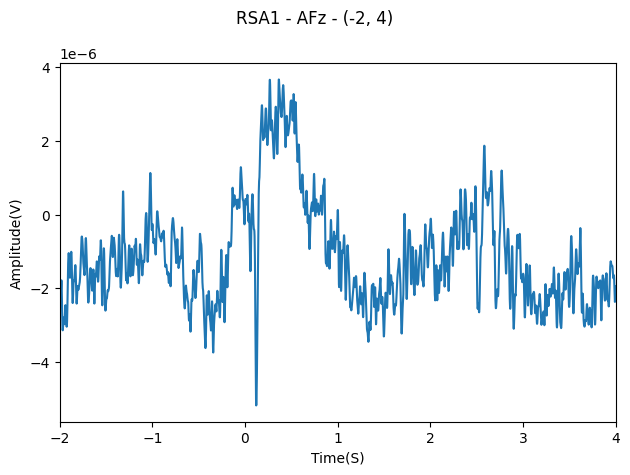

In [43]:
plot_ERP(epochs,'RSA1','AFz')